# composite_2DAnt_DJF

In [1]:
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
#
import cartopy.crs as ccrs

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
class Site:
    def DomeF(self):
        # DomeF
        # 南緯77度19分01秒 東経39度42分12秒座標: 南緯77度19分01秒 東経39度42分12秒
        sx=14 ; sy=60 #;; # 77°18′59″S 39°42′04″E
        df_lat=-77.3
        df_lon=39.66
        return df_lon,df_lat,sx,sy
df_lon, df_lat,sx,sy = Site().DomeF()

In [4]:
class draw_map:
    import cartopy.crs as ccrs
    
    def label_h(self,fig,ax,barplot,cs,levels=[0],label="",fontsize=16, fontlabel=16):
        import matplotlib.pyplot as plt
        cbar_ax = fig.add_axes(barplot)
        if levels == [0]:
            cbar=plt.colorbar(cs, cax=cbar_ax,orientation='horizontal') 
        else:
            cbar=plt.colorbar(cs, cax=cbar_ax,orientation='horizontal',ticks=levels) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontlabel)
        
        return cbar
        
    def label_v(self,fig,ax,barplot,cs,levels=[0],label="",fontsize=16, fontlabel=16):
        import matplotlib.pyplot as plt
        cbar_ax = fig.add_axes(barplot)
        if levels == [0]:
            cbar=plt.colorbar(cs, cax=cbar_ax,orientation='vertical') 
        else:        
            cbar=plt.colorbar(cs, cax=cbar_ax,orientation='vertical',ticks=levels) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontlabel)
        
        return cbar

In [5]:
class draw_Ant:
    def raw(self,ax,no,area,title,x,y,var0,norm,cmap,levels,fontsize=24):
        import cartopy.crs as ccrs
        ax[no].set_boundary(draw_Ant().circle(), transform=ax[no].transAxes)
        ax[no].set_title(title, fontsize=fontsize) 
        
        cm = plt.get_cmap(cmap)
        cs = ax[no].contourf(x, y, var0, 
                             norm=norm, cmap=cmap, levels=levels, 
                             transform=ccrs.PlateCarree(),extend = "both")
        ax[no].scatter(df_lon,df_lat,c="black", s=100, 
                       marker='^', edgecolors='white', linewidth=1, zorder=3,transform=ccrs.PlateCarree())
        ax[no].set_global()
        ax[no].coastlines()
        ax[no].set_extent(area, crs=ccrs.PlateCarree())
 
        return cs
    
    def circle(self):
        import numpy as np
        import matplotlib.path as mpath
        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        
        return circle 

In [6]:
def Color_Set(levels,cmapname):
    import matplotlib.pyplot as plt
    import matplotlib.colors as mc
    cmap = plt.get_cmap(cmapname, len(levels)+1)
    colors = cmap(range(cmap.N))
    cmap, norm = mc.from_levels_and_colors(levels,colors,extend="both")
    return cmap, norm     

In [7]:
def Color_Set_mid(vmin,vmax,mid=0):
    import matplotlib.colors as mc
    norm = mc.DivergingNorm(vmin=vmin, vcenter=mid, vmax=vmax)
    return norm     

In [8]:
loadfile = "T2_anom.npz"
dataset = np.load(loadfile)
T2 = dataset["T2"]
lon2 = dataset["lon2"]
lat2 = dataset["lat2"]
y = dataset["y"]
m = dataset["m"]
d = dataset["d"]

In [9]:
loadfile = "prcp.npz"
dataset = np.load(loadfile)
prcp = dataset["prcp"]

In [10]:
loadfile = "prcp_d18O_anom.npz"
dataset = np.load(loadfile)
prcp_d18O = dataset["prcp_d18O"]

In [11]:
loadfile = "sam.npz"
dataset = np.load(loadfile)
sam  = dataset["sam"]

In [12]:
m_p = m[sam>=1.0]
m_m = m[sam<=-1.0]

In [13]:
T2_sam_p = T2[:,:,sam>=1.0]
T2_sam_m = T2[:,:,sam<=-1.0]

In [14]:
prcp_sam_p = prcp[:,:,sam>=1.0]
prcp_sam_m = prcp[:,:,sam<=-1.0]

In [15]:
prcp_d18O_sam_p = prcp_d18O[:,:,sam>=1.0]
prcp_d18O_sam_m = prcp_d18O[:,:,sam<=-1.0]

In [19]:
T2DJF_sam_p=np.mean(T2_sam_p[:,:,((m_p==12)+(m_p==1)+(m_p==2))],2)
T2DJF_sam_m=np.mean(T2_sam_m[:,:,((m_m==12)+(m_m==1)+(m_m==2))],2)

In [20]:
prcpDJF_sam_p=np.mean(prcp_sam_p[:,:,((m_p==12)+(m_p==1)+(m_p==2))],2)
prcpDJF_sam_m=np.mean(prcp_sam_m[:,:,((m_m==12)+(m_m==1)+(m_m==2))],2)

In [21]:
d18OpwDJF_sam_p=np.mean(prcp_d18O_sam_p[:,:,((m_p==12)+(m_p==1)+(m_p==2))] 
                            *prcp_sam_p[:,:,((m_p==12)+(m_p==1)+(m_p==2))], 2) / prcpDJF_sam_p
d18OpwDJF_sam_m=np.mean(prcp_d18O_sam_m[:,:,((m_m==12)+(m_m==1)+(m_m==2))] 
                        *prcp_sam_m[:,:,((m_m==12)+(m_m==1)+(m_m==2))] ,2) / prcpDJF_sam_m

In [22]:
label_sam_p="$\mathsf{SAM^+}$"
label_sam_m="$\mathsf{SAM^-}$"

In [23]:
T2_levels = [-10,-8,-6,-4,-2,-1,1,2,4,6,8,10]
T2_cmapname = "coolwarm"
T2_cmap, T2_norm = Color_Set(T2_levels, T2_cmapname)
T2_label = "Surface Air Temperature anomaly [℃]"

In [24]:
prcp_levels =  [50,75,80,95,105,120,150,200]
prcp_cmapname = "PuOr"
prcp_cmap, prcp_norm = Color_Set(prcp_levels, prcp_cmapname)
prcp_label = "Precipitation ratio [%]"

In [25]:
d18Opw_levels = [-30,-20,-16,-12,-10,-4,-2,2,4,10,12,16,20,30]
d18Opw_cmapname = "PiYG_r"
d18Opw_cmap, d18Opw_norm = Color_Set(d18Opw_levels, d18Opw_cmapname)
d18Opw_label="$\mathsf{\delta ^{18}O_p}$ anomaly [‰]"

In [26]:
levels = [-10,-8,-6,-4,-2,-1,1,2,4,6,8,10]
cmapname = "coolwarm"
cmap, norm = Color_Set(levels, cmapname)

def draw_field3(title, var1, var2, var3, title1="",title2="",title3="", label1="",label2="", label3="",
                levels1=levels, cmap1=cmap, norm1=norm, levels2=levels, cmap2=cmap, norm2=norm, 
                levels3=levels, cmap3=cmap, norm3=norm):
    # colorbar
    barplot3=np.zeros((3,4))
    barplot3[0,:]=[0.02, 0.1, 0.3, 0.05]
    barplot3[1,:]=[0.35, 0.1, 0.3, 0.05 ]
    barplot3[2,:]=[0.68, 0.1, 0.3, 0.05 ]
    
    fig, ax = plt.subplots(1, 3, figsize=(15,6),
                                   subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
    cs = draw_Ant().raw(ax,0,[-180, 180, -90, -60],title1,lon2,lat2,var1,norm1,cmap1,levels1,16)
    draw_map().label_h(fig,ax,barplot3[0,:], cs,levels1,label1,16)
    cs = draw_Ant().raw(ax,1,[-180, 180, -90, -60],title2,lon2,lat2,var2,norm2,cmap2,levels2,16)
    draw_map().label_h(fig,ax,barplot3[1,:], cs,levels2,label2,16)
    cs = draw_Ant().raw(ax,2,[-180, 180, -90, -60],title3,lon2,lat2,var3,norm3,cmap3,levels3,16)
    draw_map().label_h(fig,ax,barplot3[2,:], cs,levels3,label3,12)    

#    fig.text(0.02, 0.9,title , fontsize=32)
    fig.text(0.02, 0.9,"(a)" , fontsize=24, weight="demibold")
    fig.text(0.33, 0.9,"(b)" , fontsize=24, weight="demibold")
    fig.text(0.66, 0.9,"(c)" , fontsize=24, weight="demibold")
    plt.subplots_adjust(top=0.98,bottom=0.1,left=0.02,right=0.98,hspace=0.05,wspace=0.05)

    fig.show()
    
    return fig

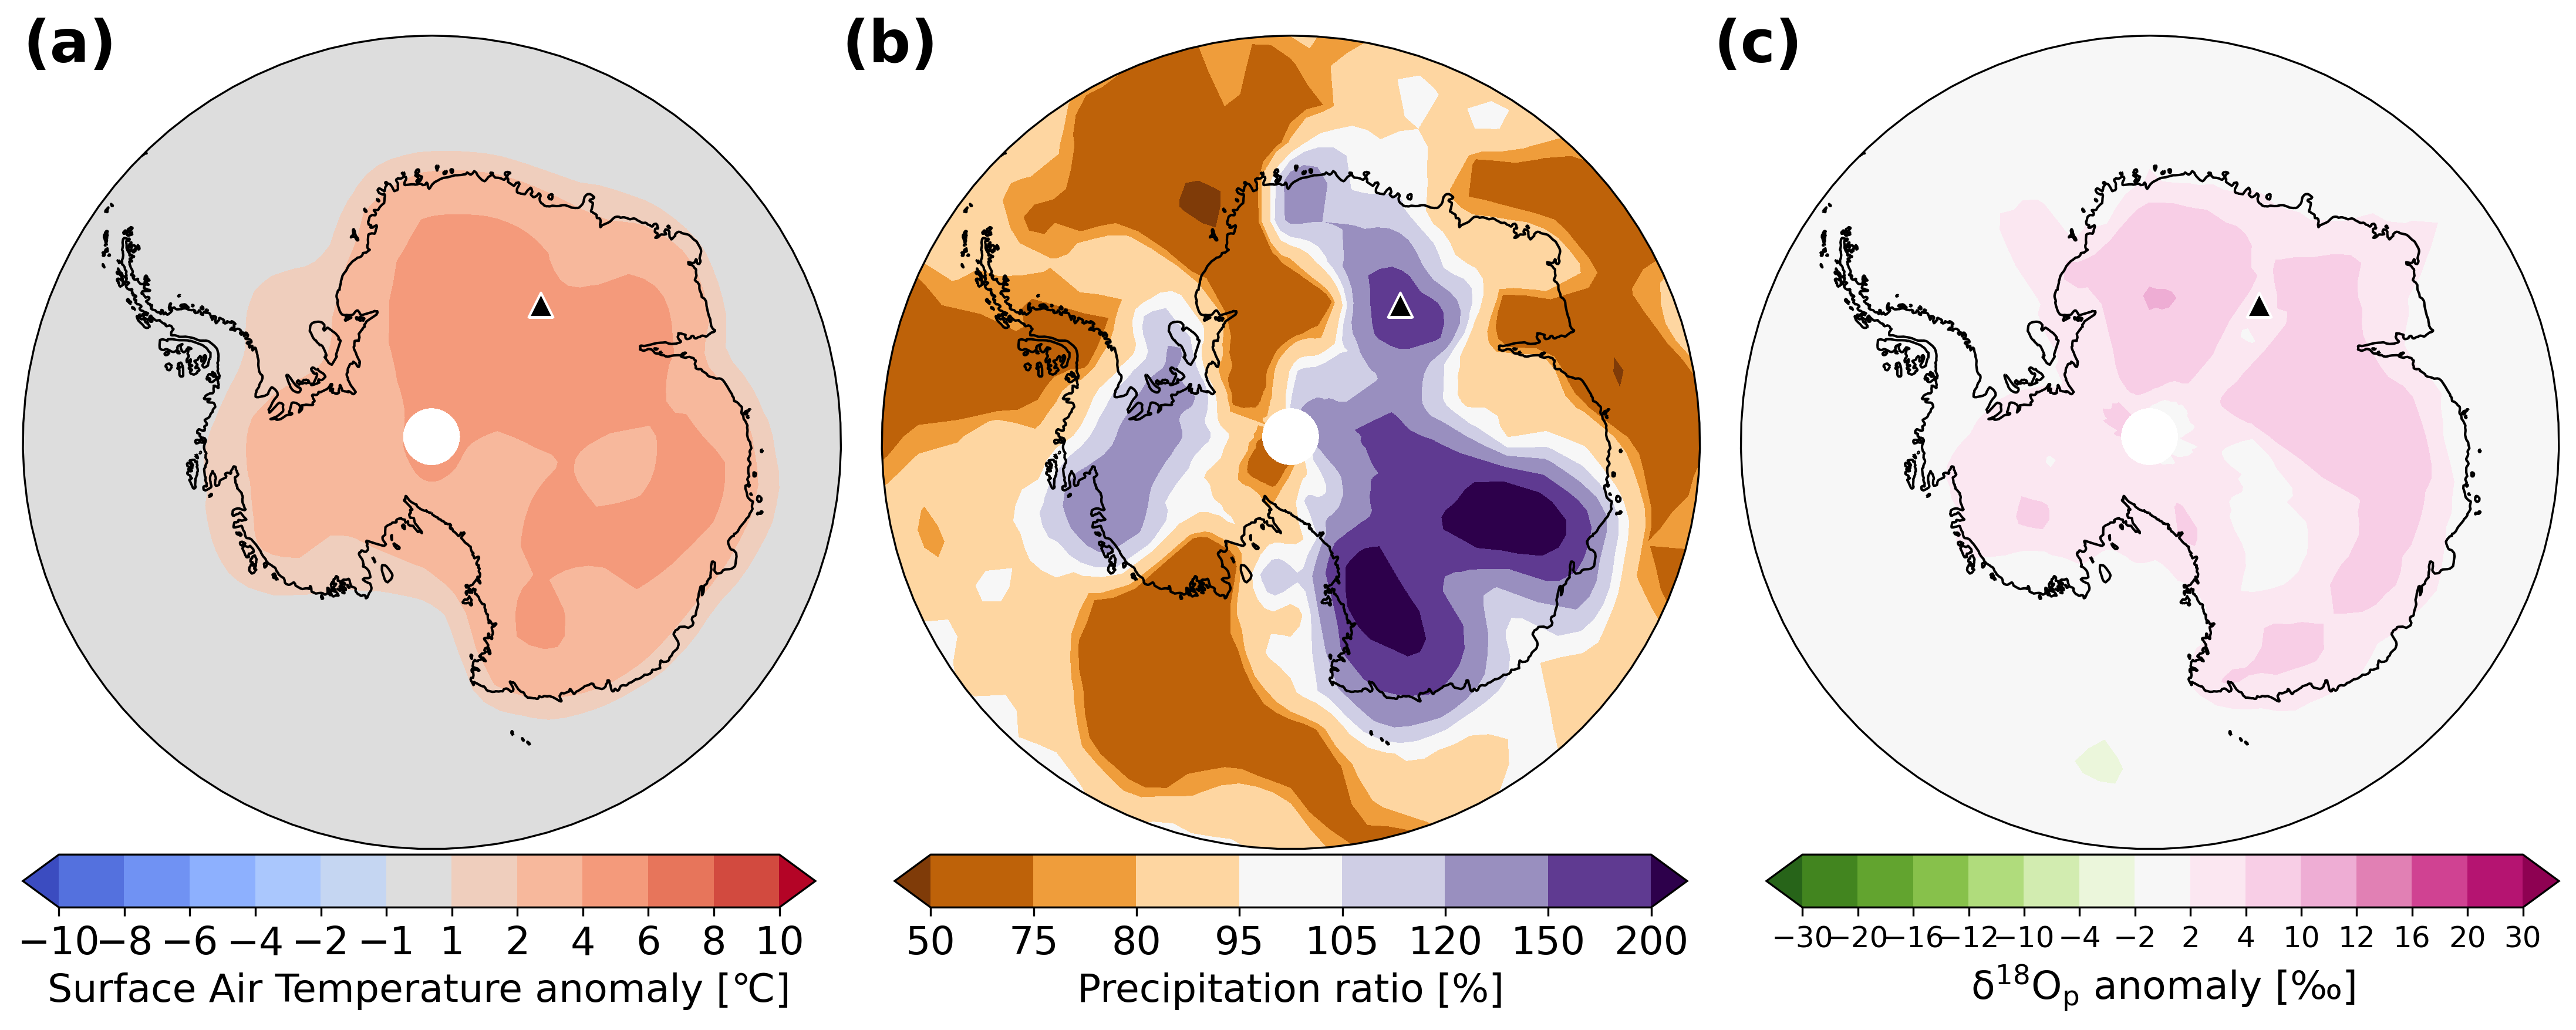

In [27]:
fig = draw_field3("DJF",T2DJF_sam_m-T2DJF_sam_p,prcpDJF_sam_m/prcpDJF_sam_p*100, 
            d18OpwDJF_sam_m-d18OpwDJF_sam_p, 
            "", "", "", 
            T2_label, prcp_label, d18Opw_label, 
            T2_levels, T2_cmap, T2_norm, prcp_levels, prcp_cmap, prcp_norm, 
            d18Opw_levels, d18Opw_cmap, d18Opw_norm)
fig.savefig("composite_2DAnt_DJF.png")

In [28]:
df_lon,df_lat,df_x,df_y = Site().DomeF()
df=pd.DataFrame.from_dict({
    "$\mathsf{SAM^--SAM^+ @ Dome F}$": 
    [T2DJF_sam_m[df_x-1,df_y-1]-T2DJF_sam_p[df_x-1,df_y-1],
     d18OpwDJF_sam_m[df_x-1,df_y-1]-d18OpwDJF_sam_p[df_x-1,df_y-1]
    ]},orient="index")
df.columns = ["SAT (DJF)","$\mathsf{\delta ^{18}O_p}$ (DJF)"]
display(df)

,SAT (DJF),$\mathsf{\delta ^{18}O_p}$ (DJF)
$\mathsf{SAM^--SAM^+ @ Dome F}$,4.312394,3.613661


Kanon Kino (kanon[at]aori.u-tokyo.ac.jp)